In [28]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout, Bidirectional, Concatenate
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\loken\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
voc_size=5000
sent_length=20

In [3]:
df=pd.read_csv('train.csv')

In [4]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df=df.dropna()

In [6]:
X=df.drop('label',axis=1)

In [7]:
y=df['label']

In [8]:
X.shape

(18285, 4)

In [9]:
y.shape

(18285,)

In [10]:
messages=X.copy()
messages.reset_index(inplace=True)

In [11]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus

In [12]:
onehot_repr=[one_hot(words,voc_size)for words in corpus]

In [13]:
onehot_repr

[[4746, 4002, 4505, 3535, 3537, 2475, 3766, 4640, 1934, 2448],
 [1050, 1266, 4026, 90, 3168, 2856, 3564],
 [1057, 122, 69, 380],
 [4171, 3799, 1260, 3669, 582, 1210],
 [1586, 3168, 744, 81, 2892, 357, 3168, 3646, 2959, 1687],
 [4494,
  27,
  4012,
  2706,
  2600,
  2779,
  2322,
  4967,
  1188,
  1971,
  2220,
  1915,
  568,
  2196,
  3564],
 [1258, 4924, 787, 91, 951, 2424, 3811, 1318, 4808, 3835, 1626],
 [2105, 2525, 585, 1278, 3112, 1546, 2779, 660, 4808, 3835, 1626],
 [1624, 2684, 3138, 2118, 1937, 3683, 2973, 1988, 2779, 4160],
 [3142, 1785, 1425, 1329, 403, 1810, 293, 2410],
 [3124, 4214, 2692, 4877, 1538, 3497, 3804, 131, 4145, 3622, 736],
 [3669, 4182, 3537, 3683, 2779, 3112],
 [1297, 2062, 4017, 991, 1568, 1617, 1717, 2667, 574],
 [2577, 2065, 631, 100, 4514, 3364, 4050, 4808, 3835, 1626],
 [792, 1769, 3127, 1512, 753, 4808, 3835, 1626],
 [2554, 412, 1039, 3811, 1135, 4433, 1555, 1837, 3650, 2872],
 [4359, 3102, 1266],
 [4343, 3041, 4554, 3255, 2779, 2282, 3685, 3564],
 [4705,

In [14]:
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 4640 1934 2448]
 [   0    0    0 ... 3168 2856 3564]
 [   0    0    0 ...  122   69  380]
 ...
 [   0    0    0 ... 4808 3835 1626]
 [   0    0    0 ... 3608  924 1908]
 [   0    0    0 ...  725 2046 2098]]


In [ ]:
embedded_docs[0]

In [15]:
embedding_vector_features=300
title_vocab = 100
text_vocab = 100
title_input_length = 13
text_input_length = 1606

In [ ]:
title_embed = Embedding(title_vocab,300,input_length=title_input_length)
text_embed = Embedding(text_vocab,300,input_length=text_input_length)
title_lstm = Bidirectional(LSTM(46))(title_embed)
text_lstm = Bidirectional(LSTM(231))(text_embed)
con = Concatenate([nlp_out, meta_input])
dense1 = Dense(73)(con)
dense2 = Dense(24)(dense1)
drop = Dropout(0.106)(dense2)
output = Dense(1,activation='sigmoid')
model = Model(inputs=[title_embed,text_embed], outputs=output)

In [16]:
model=Sequential()
model.add(Embedding(voc_size,40,input_length=sent_length))
model.add(LSTM(200))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
lstm (LSTM)                  (None, 200)               192800    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 393,001
Trainable params: 393,001
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
len(embedded_docs),y.shape

(18285, (18285,))

In [18]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [19]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [23]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=64)

Epoch 1/5
192/192 [==============================] - 24s 123ms/step - loss: 0.3419 - accuracy: 0.8491 - val_loss: 0.1941 - val_accuracy: 0.9175
Epoch 2/5
192/192 [==============================] - 22s 114ms/step - loss: 0.1309 - accuracy: 0.9495 - val_loss: 0.1995 - val_accuracy: 0.9186
Epoch 3/5
192/192 [==============================] - 22s 113ms/step - loss: 0.0887 - accuracy: 0.9678 - val_loss: 0.2291 - val_accuracy: 0.9200
Epoch 4/5
192/192 [==============================] - 21s 110ms/step - loss: 0.0525 - accuracy: 0.9826 - val_loss: 0.2894 - val_accuracy: 0.9183
Epoch 5/5
192/192 [==============================] - 21s 109ms/step - loss: 0.0312 - accuracy: 0.9904 - val_loss: 0.3318 - val_accuracy: 0.9158


In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [33]:
y_pred=(model.predict(X_test) > 0.5).astype("int32")
print('Confusion Metrics',confusion_matrix(y_test,y_pred))
print('Accuracy',accuracy_score(y_test,y_pred))

Confusion Metrics [[3113  306]
 [ 202 2414]]
Accuracy 0.915824357912179


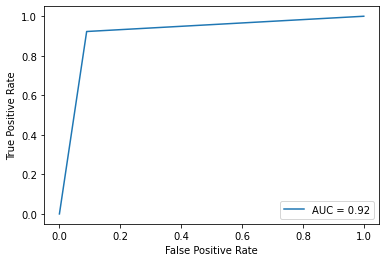

In [35]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay
import matplotlib.pyplot as plt
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()